In [56]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import joblib

## Cargue de datos

In [35]:
train = pd.read_csv("s3://german-credit-255423/datos/train/train.csv")
test = pd.read_csv("s3://german-credit-255423/datos/test/test.csv")

## Creación del pipeline

In [36]:
numeric_pipeline = Pipeline(
    [
        ('Imputación con la media',   SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
        
    ]
)

In [37]:
categorical_pipeline = Pipeline(
        [
            ('imputación moda', SimpleImputer(strategy='most_frequent')),
            ('onehot encoder', OneHotEncoder(sparse=False))
        ]

)

In [38]:
column_transformer = ColumnTransformer(
            [
                ('numeric pipeline', numeric_pipeline, [0, 1, 2]),
                ('categorical pipeline', categorical_pipeline, [3, 4, 5])
            ]
)

In [39]:
features = ["Age", "Credit amount", "Duration", "Sex", "Purpose", "Housing"]

### Selección de características

In [40]:
train = train.dropna()

In [41]:
X_train = train.drop(["Risk", "Unnamed: 0"], axis=1)

In [42]:
y_train = train["Risk"]

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               361 non-null    int64 
 1   Sex               361 non-null    object
 2   Job               361 non-null    int64 
 3   Housing           361 non-null    object
 4   Saving accounts   361 non-null    object
 5   Checking account  361 non-null    object
 6   Credit amount     361 non-null    int64 
 7   Duration          361 non-null    int64 
 8   Purpose           361 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


In [44]:
X_train = pd.get_dummies(X_train)

In [45]:
model = DecisionTreeClassifier()

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
model.feature_importances_

array([0.12443203, 0.04064761, 0.30135959, 0.19628039, 0.0182134 ,
       0.01025807, 0.02620219, 0.        , 0.03521021, 0.0149864 ,
       0.03057997, 0.01864187, 0.01925574, 0.02879681, 0.02060631,
       0.00599456, 0.        , 0.05994562, 0.        , 0.00760165,
       0.02155634, 0.01115465, 0.00827658, 0.        ])

In [50]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

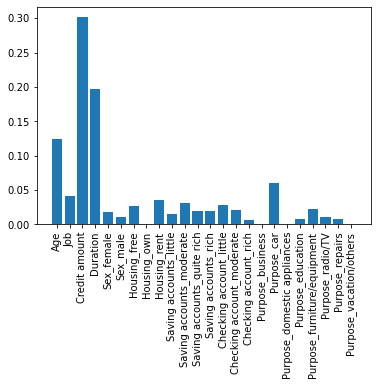

In [55]:
plt.bar(x=X_train.columns, 
        height=model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [63]:
order_columns = X_train.columns[np.argsort(model.feature_importances_)[::-1]]

In [ ]:
order_importance = np.sort()

In [ ]:
plt.bar(x=X_train.columns, 
        height=model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()